<a href="https://colab.research.google.com/github/Paarthaenon/Adv.-ML-Public-Repo/blob/master/Advanced_Machine_Learning_HW_1_(VERSION_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projects in Advanced Machine Learning HW#1 - Paarth Malkan

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn as sk
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import pickle
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [0]:
# Ignore Warnings

from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
data = pd.read_csv("MLHW1_World_Regions_csv.csv")
print (data.head())
print ('---------------------------------------------------------------------------------')
print(data.describe())

  Happiness_level  Happiness_ordinal  ... Generosity PerceptionsCorruptions
0       Very High                  5  ...      0.153                  0.393
1       Very High                  5  ...      0.252                  0.410
2       Very High                  5  ...      0.271                  0.341
3       Very High                  5  ...      0.354                  0.118
4       Very High                  5  ...      0.322                  0.298

[5 rows x 12 columns]
---------------------------------------------------------------------------------
       Happiness_ordinal   GDPcapita  ...  Generosity  PerceptionsCorruptions
count         156.000000  156.000000  ...  156.000000              156.000000
mean            3.006410    0.905147  ...    0.184846                0.110603
std             1.416478    0.398389  ...    0.095254                0.094538
min             1.000000    0.000000  ...    0.000000                0.000000
25%             2.000000    0.602750  ...    0.10

### 1. Explore bivariate results (Use visualizations!). Describe any relationships you see between particular features and the target variable

In [7]:
# OLS Regression between social support (ind. variable) and happiness level (dep. variable)

socsupport_happiness_lr = smf.ols(formula = "Happiness_ordinal ~ SocialSupport", data=data).fit()
print (socsupport_happiness_lr.summary())

                            OLS Regression Results                            
Dep. Variable:      Happiness_ordinal   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     184.8
Date:                Fri, 21 Feb 2020   Prob (F-statistic):           3.69e-28
Time:                        01:04:35   Log-Likelihood:                -213.66
No. Observations:                 156   AIC:                             431.3
Df Residuals:                     154   BIC:                             437.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.2204      0.320     -3.811

##### To explore a bivariate result, I ran an OLS regression between the independent variable of social support and the target variable of happiness. In the dataset, I created another column where I set ordinal values that correspond the happiness level. 5 corresponds to "very high" and 1 corresponds to "very low." I hypothesized that as levels of social support go up, happiness increases. According to the regression results, I was correct in my findings. As social support goes up by 1, happiness goes up by 3.497. This is highly statistically significant given the p-score of 0. This means that there is 0% chance this relationship exists randomly. Additionally, the model fits the data relatively well, with an r-squared value of .545. 

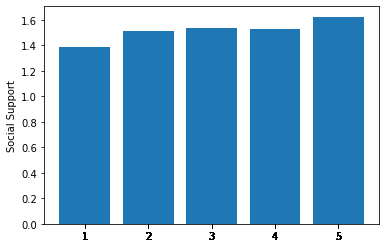

In [8]:
# Bar chart of Happiness (1 = very low, 5 = very high) and Social Support

plt.bar(data.Happiness_ordinal, data.SocialSupport)
plt.xticks(data.Happiness_ordinal)
plt.ylabel("Social Support")
plt.show()

##### As seen in the bar chart above, countries with "very high" levels of happines (5) enjoy more social support than countries with "very low" levels of happiness, who have the lowest levels of social support. This suggests that the more social support a country provides it's citizens, the happier the citizens. 

In [9]:
# OLS Regression between GDP per capita (ind. variable) and happiness level (dep. variable)

GDPcapita_happiness_lr = smf.ols(formula = "Happiness_ordinal~ GDPcapita", data=data).fit()
print (GDPcapita_happiness_lr.summary())

                            OLS Regression Results                            
Dep. Variable:      Happiness_ordinal   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     255.1
Date:                Fri, 21 Feb 2020   Prob (F-statistic):           1.74e-34
Time:                        01:04:39   Log-Likelihood:                -198.97
No. Observations:                 156   AIC:                             401.9
Df Residuals:                     154   BIC:                             408.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4652      0.174      2.677      0.0

##### ##### To another bivariate result, I ran an OLS regression between the independent variable of GDP per capita and the dependent variable of happiness. I hypothesized that as GDP per capita goes up, happiness increases. According to the regression results, I was correct in my findings. As GDP per capita goes up by 1, happiness goes up by 2.808. This is highly statistically significant given the p-score of 0. This means that there is 0% chance this relationship exists randomly. Additionally, the model fits the data well, with an r-squared value of .624. 

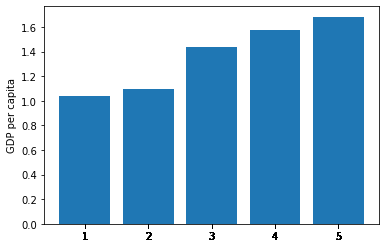

In [10]:
# Bar chart of Happiness (1 = very low, 5 = very high) and GDP per capita

plt.bar(data.Happiness_ordinal, data.GDPcapita)
plt.xticks(data.Happiness_ordinal)
plt.ylabel("GDP per capita")
plt.show()

##### As seen in the bar chart above, countries with higher happiness levels enjoy significantly higher GDP per capita than countries with lower levels of happiness. This suggests that the more wealth a country has, the happier it's citizens. 

In [5]:
# Splitting the data into target and feature variables to prepare for one hot encoding and subsequent prediction models

X = data.drop(["Happiness_level", "Happiness_ordinal", "Country or region", "Abbreviation", "Continent"], axis = 1)
y = data["Happiness_level"]

print (X.shape)
print (X.head())
print (y.shape)
print (y.head())

# Train, test, splitting of target and feature variables
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape)
print(y_train.shape)

(156, 7)
         Subregion  GDPcapita  ...  Generosity  PerceptionsCorruptions
0  Northern Europe      1.340  ...       0.153                   0.393
1  Northern Europe      1.383  ...       0.252                   0.410
2  Northern Europe      1.488  ...       0.271                   0.341
3  Northern Europe      1.380  ...       0.354                   0.118
4   Western Europe      1.396  ...       0.322                   0.298

[5 rows x 7 columns]
(156,)
0    Very High
1    Very High
2    Very High
3    Very High
4    Very High
Name: Happiness_level, dtype: object
(117, 7)
(117,)


In [6]:
# Developing preprocessing pipelines 

numeric_features=X.columns.tolist()
numeric_features.remove('Subregion')

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Subregion']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


#Fitting preprocessor object
prediction_input_preprocessor=preprocessor.fit(X_train) 

pickle.dump(prediction_input_preprocessor, open( "preprocessor.pkl", "wb" ) )

# Looking at post-processed shapes
print (prediction_input_preprocessor.transform(X_train).shape)
print (pd.get_dummies(y_train).shape)

# Assigning processed X and y train data to objects

processed_X_train = prediction_input_preprocessor.transform(X_train)
processed_y_train = pd.get_dummies(y_train)

(117, 20)
(117, 5)


### 2. Examine features that predict happiness categories using one or more models that allow for automatic feature selection. Explain any meaningful findings

In [13]:
# Lasso regression to observe predictive variables with target variable of happiness

X_predictive = data.drop(["Happiness_level", "Happiness_ordinal", "Country or region", "Abbreviation", "Continent", "Subregion"], axis = 1)
y_predictive = data["Happiness_ordinal"]

vari_lasso = Lasso(alpha = 0, normalize = True)
vari_lasso_coef = vari_lasso.fit(X_predictive, y_predictive).coef_
print(vari_lasso_coef)
print(vari_lasso_coef.shape)

[1.07871879 0.93739894 1.83191933 1.85504487 0.21958188 0.26051596]
(6,)


##### Above, I ran an lasso regression to determine which feature variables are most predictive of the target variable. The features are: GDP per capita, social support, healthy life expectancy, freedom of life choices, generosity, and perceptions of corruption. The target variable is the ordinal ranking of happiness in a range of 1 to 5. 5 corresponds to "very high" happiness and 1 corresponds to "very low" happiness. According to the lasso regression, the features that are most predictive, in order from greatest to least, are: 1) freedom of life choices, 2) healthy life expectancy, 3) GDP per capita, 4) social support, 5) perceptions of corruption, 6) generosity. 

### 3. Run at least three prediction models to try to predict World Happiness well.

In [14]:
# KNN classifier with gridsearch and 10 fold CV

param_grid = {"n_neighbors": np.arange(1, 50)}
knnc = KNeighborsClassifier()
knnc_gscv = GridSearchCV(knnc, param_grid, cv = 10)
knnc_gscv.fit(processed_X_train, processed_y_train)

print ("Best gridsearch hyperparameter value:", knnc_gscv.best_params_)
print ("KNN classifier gridsearch cross-validation score:", knnc_gscv.best_score_)
print ("KNN classifier test data accuracy:", knnc_gscv.score(prediction_input_preprocessor.transform(X_test), pd.get_dummies(y_test)))

Best gridsearch hyperparameter value: {'n_neighbors': 1}
KNN classifier gridsearch cross-validation score: 0.5204545454545453
KNN classifier test data accuracy: 0.3076923076923077


##### Above, I ran a KNN classifier model with gridsearch and 10 fold CV. I set the n_neighbors parameters grid range from 1 to 50. After running the model with 10 folds, the best model returned used 1 neighbor as the hyperparameter. The best CV score is .521 and the test-set accuracy is .308.

In [15]:
# KNN classifier with 3 neighbors and 10 fold cv
# (NOTE: I'm an extra KNN model b/c I want to see the scores if I set the n_neighbors to 3)

knnc_2 = KNeighborsClassifier(n_neighbors = 3).fit(processed_X_train, processed_y_train)
knn_cv_scores = cross_val_score(knnc_2, processed_X_train, processed_y_train, cv =10)
print ("KNN classifier w/3 neighbors mean CV score:", np.mean(knn_cv_scores))
print ("KNN classifier w/3 neighbors test data accuracy:", knnc_2.score(prediction_input_preprocessor.transform(X_test), pd.get_dummies(y_test)))

KNN classifier w/3 neighbors mean CV score: 0.4446969696969697
KNN classifier w/3 neighbors test data accuracy: 0.38461538461538464


##### Above, I developed another KNN classifier model, this time relinquishing the gridsearch and setting the neighbors value to 3. I did so because in the previous KNN model, the gridsearch returned the best hyperparameter as 1, and I wanted to see if it would return a higher accuracy with more neighbors. The best CV score decreased to .445 however the test-set accuracy increased to .385. 

In [16]:
# Random forest classifier with gridsearch and 10 fold CV

param_grid_2 = {"n_estimators": np.arange(1, 100)}
rfc = RandomForestClassifier()
rfc_gscv = GridSearchCV(rfc, param_grid_2, cv=10)
rfc_gscv.fit(processed_X_train, processed_y_train)

print ("Best gridsearch hyperparameter value:", rfc_gscv.best_params_)
print ("Random forests classifier gridsearch cross-validation score:", rfc_gscv.best_score_)
print ("Random forests classifier test data accuracy:", rfc_gscv.score(prediction_input_preprocessor.transform(X_test), pd.get_dummies(y_test)))

Best gridsearch hyperparameter value: {'n_estimators': 7}
Random forests classifier gridsearch cross-validation score: 0.48863636363636365
Random forests classifier test data accuracy: 0.358974358974359


##### Above, I ran a random forest model with gridsearch and 10 fold CV. I set the n_estimators hyperparameter range from 1 to 100. The best model returned used an n_estimators value of 1. The best CV score is .513 and the test-set accuracy is .282. 

In [50]:
# Logistic regression with gridsearch and 10 fold CV

param_grid_3 = {"C": np.arange(1, 1000)}
logreg = LogisticRegression()
log_gscv = GridSearchCV(logreg, param_grid_3, cv=10)
log_gscv.fit(processed_X_train, y_train)
log_gscv.best_score_

print ("Best gridsearch hyperparameter value:", log_gscv.best_params_)
print ("Logistic regression gridsearch cross-validation score:", log_gscv.best_score_)
print ("Logistic regression test data accuracy:", log_gscv.score(prediction_input_preprocessor.transform(X_test), y_test))

Best gridsearch hyperparameter value: {'C': 5}
Logistic regression gridsearch cross-validation score: 0.5666666666666668
Logistic regression test data accuracy: 0.46153846153846156


##### Above, I ran a logistic regression model with gridsearch and 10 fold CV. I set the C hyperparameter range from 1 to 1000. The best model returned used a C value of 5. The best CV score is .566 and the test-set accuracy is .462.

##### Of every model I ran, the logistic regression with a hyperparameter of 1 and 10 folds returned the highest accuracy. I has a CV score of .566 and test-set accuracy of .462. 

In [0]:
# Prediction of target data using prior logistic regression model

y_log_gscv_pred=log_gscv.predict(prediction_input_preprocessor.transform(X_test))

In [104]:
# Model evaluation for logistic regression results

model_eval_metrics(y_test,y_log_gscv_pred,classification="TRUE")

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.435897,0.431814,0.496923,0.463889,0,0,0,0


In [7]:
# Vanilla neural network

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import keras
from keras.optimizers import SGD

nn = Sequential()
nn.add(Dense(124, input_dim=20, activation='relu'))
nn.add(Dense(124, activation='relu'))
nn.add(Dense(124, activation='relu'))

nn.add(Dense(5, activation='softmax')) 
                                            
nn.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

nn.fit(processed_X_train, processed_y_train, 
               batch_size = 60, 
               epochs = 500, validation_split=0.2) 

Using TensorFlow backend.







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 93 samples, validate on 24 samples
Epoch 1/500





93/93 [==============================] - 1s 8ms/step - loss: 1.6029 - acc: 0.2581 - val_loss: 1.6023 - val_acc: 0.2083
Epoch 2/500
93/93 [==============================] - 0s 195us/step - loss: 1.5949 - acc: 0.2796 - val_loss: 1.5965 - val_acc: 0.2083
Epoch 3/500
93/93 [==============================] - 0s 143us/step - loss: 1.5875 - acc: 0.3011 - val_loss: 1.5908 - val_acc: 0.2917
Epoch 4/500
93/93 [==============================] - 0s 175us/step - loss: 1.5798 - acc: 0.3548 - val_loss: 1.5849 - val_acc: 0.2917
Epoch 5/500
93/93 [==============================] - 0s 129us/step - loss: 1.5723 - acc: 0.3763 - val_loss: 1.5793 - val_acc: 0.3333
Epoch 6/500
93/93 [==============================] - 0s 168us/step - loss: 1.5652 - acc: 0.3871 - val_loss: 1.5737 - val_acc: 0.3333
Epoch 7/500
93/93 [==============================] - 

In [0]:
nn_pred=nn.predict(prediction_input_preprocessor.transform(X_test))

In [10]:
# Predicting vanilla neural network labels

print(nn.predict_classes(prediction_input_preprocessor.transform(X_test)))

prediction_index=nn.predict_classes(prediction_input_preprocessor.transform(X_test))

labels=processed_y_train.columns

def index_to_label(labels,index_n): 
    return labels[index_n]
    
index_to_label(labels,1)

nn_predicted_labels=list(map(lambda x: labels[x], prediction_index))
print(nn_predicted_labels)

[1 0 0 1 4 1 0 0 1 2 1 0 3 2 1 1 4 4 2 0 4 3 1 3 1 2 0 1 0 4 0 2 1 4 2 4 4
 4 1]
['High', 'Average', 'Average', 'High', 'Very Low', 'High', 'Average', 'Average', 'High', 'Low', 'High', 'Average', 'Very High', 'Low', 'High', 'High', 'Very Low', 'Very Low', 'Low', 'Average', 'Very Low', 'Very High', 'High', 'Very High', 'High', 'Low', 'Average', 'High', 'Average', 'Very Low', 'Average', 'Low', 'High', 'Very Low', 'Low', 'Very Low', 'Very Low', 'Very Low', 'High']


In [31]:
# Model evaluation for vanilla neural network results

import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import pandas as pd
from math import sqrt

def model_eval_metrics(y_true, y_pred,classification="TRUE"):
     if classification=="TRUE":
        accuracy_eval = accuracy_score(y_true, y_pred)
        f1_score_eval = f1_score(y_true, y_pred,average="macro",zero_division=0)
        precision_eval = precision_score(y_true, y_pred,average="macro",zero_division=0)
        recall_eval = recall_score(y_true, y_pred,average="macro",zero_division=0)
        mse_eval = 0
        rmse_eval = 0
        mae_eval = 0
        r2_eval = 0
        metricdata = {'accuracy': [accuracy_eval], 'f1_score': [f1_score_eval], 'precision': [precision_eval], 'recall': [recall_eval], 'mse': [mse_eval], 'rmse': [rmse_eval], 'mae': [mae_eval], 'r2': [r2_eval]}
        finalmetricdata = pd.DataFrame.from_dict(metricdata)
     else:
        accuracy_eval = 0
        f1_score_eval = 0
        precision_eval = 0
        recall_eval = 0
        mse_eval = mean_squared_error(y_true, y_pred)
        rmse_eval = sqrt(mean_squared_error(y_true, y_pred))
        mae_eval = mean_absolute_error(y_true, y_pred)
        r2_eval = r2_score(y_true, y_pred)
        metricdata = {'accuracy': [accuracy_eval], 'f1_score': [f1_score_eval], 'precision': [precision_eval], 'recall': [recall_eval], 'mse': [mse_eval], 'rmse': [rmse_eval], 'mae': [mae_eval], 'r2': [r2_eval]}
        finalmetricdata = pd.DataFrame.from_dict(metricdata)
     return finalmetricdata

model_eval_metrics( y_test,nn_predicted_labels,classification="TRUE")
nn_model_eval = model_eval_metrics( y_test,nn_predicted_labels,classification="TRUE")
nn_model_eval


,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.435897,0.439548,0.511111,0.452778,0,0,0,0


In [65]:
# NN with dropout regularization 

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,BatchNormalization
import keras
from keras.optimizers import SGD
nn_dropout = Sequential()
nn_dropout.add(Dense(64, input_dim=20, activation='relu'))
nn_dropout.add(Dropout(.3))
nn_dropout.add(Dense(64, activation='relu'))
nn_dropout.add(Dropout(.3))
nn_dropout.add(Dense(64, activation='relu'))
nn_dropout.add(Dropout(.3))
nn_dropout.add(Dense(5, activation='softmax')) 
                                            
nn_dropout.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

nn_dropout.fit(processed_X_train, processed_y_train, epochs = 500)

Epoch 1/500
117/117 [==============================] - 9s 81ms/step - loss: 1.6299 - acc: 0.2479
Epoch 2/500
117/117 [==============================] - 0s 353us/step - loss: 1.6269 - acc: 0.2137
Epoch 3/500
117/117 [==============================] - 0s 357us/step - loss: 1.5973 - acc: 0.2479
Epoch 4/500
117/117 [==============================] - 0s 416us/step - loss: 1.5759 - acc: 0.2821
Epoch 5/500
117/117 [==============================] - 0s 378us/step - loss: 1.5907 - acc: 0.2479
Epoch 6/500
117/117 [==============================] - 0s 383us/step - loss: 1.5863 - acc: 0.1966
Epoch 7/500
117/117 [==============================] - 0s 414us/step - loss: 1.6026 - acc: 0.2735
Epoch 8/500
117/117 [==============================] - 0s 375us/step - loss: 1.5672 - acc: 0.2735
Epoch 9/500
117/117 [==============================] - 0s 413us/step - loss: 1.5462 - acc: 0.2906
Epoch 10/500
117/117 [==============================] - 0s 390us/step - loss: 1.5656 - acc: 0.2735
Epoch 11/500
117/117

In [88]:
# Predicting vanilla neural network with dropout labels

print(nn_dropout.predict_classes(prediction_input_preprocessor.transform(X_test)))

prediction_index_nn_dropout=nn_dropout.predict_classes(prediction_input_preprocessor.transform(X_test))

labels=processed_y_train.columns

def index_to_label(labels,index_n): 
    return labels[index_n]
    
index_to_label(labels,1)

nn_dropout_predicted_labels=list(map(lambda x: labels[x], prediction_index_nn_dropout))
print(nn_dropout_predicted_labels)

[1 0 0 1 4 1 2 0 1 2 1 0 3 2 1 1 4 4 4 0 4 3 1 3 1 2 0 1 1 4 0 2 1 4 2 4 4
 4 1]
['High', 'Average', 'Average', 'High', 'Very Low', 'High', 'Low', 'Average', 'High', 'Low', 'High', 'Average', 'Very High', 'Low', 'High', 'High', 'Very Low', 'Very Low', 'Very Low', 'Average', 'Very Low', 'Very High', 'High', 'Very High', 'High', 'Low', 'Average', 'High', 'High', 'Very Low', 'Average', 'Low', 'High', 'Very Low', 'Low', 'Very Low', 'Very Low', 'Very Low', 'High']


In [89]:
# Vanilla neural network with dropout regularization evaluation

model_eval_metrics(y_test,nn_dropout_predicted_labels,classification="TRUE")
nn_dropout_model_eval = model_eval_metrics( y_test,nn_dropout_predicted_labels,classification="TRUE")
nn_dropout_model_eval

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.512821,0.516576,0.59978,0.533333,0,0,0,0


In [74]:
# NN with L2 regularization
from keras.regularizers import l2

nn_penalized = Sequential()
nn_penalized.add(Dense(64, input_dim=20, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
nn_penalized.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
nn_penalized.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
nn_penalized.add(Dense(5, activation='softmax')) 
                                            
nn_penalized.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

nn_penalized.fit(processed_X_train, processed_y_train, epochs = 500)  

Epoch 1/500
117/117 [==============================] - 10s 81ms/step - loss: 3.1681 - acc: 0.3077
Epoch 2/500
117/117 [==============================] - 0s 312us/step - loss: 3.1551 - acc: 0.2991
Epoch 3/500
117/117 [==============================] - 0s 303us/step - loss: 3.1424 - acc: 0.2991
Epoch 4/500
117/117 [==============================] - 0s 306us/step - loss: 3.1296 - acc: 0.3077
Epoch 5/500
117/117 [==============================] - 0s 310us/step - loss: 3.1172 - acc: 0.3248
Epoch 6/500
117/117 [==============================] - 0s 314us/step - loss: 3.1053 - acc: 0.3419
Epoch 7/500
117/117 [==============================] - 0s 341us/step - loss: 3.0940 - acc: 0.3419
Epoch 8/500
117/117 [==============================] - 0s 353us/step - loss: 3.0828 - acc: 0.3590
Epoch 9/500
117/117 [==============================] - 0s 310us/step - loss: 3.0710 - acc: 0.3675
Epoch 10/500
117/117 [==============================] - 0s 351us/step - loss: 3.0599 - acc: 0.3675
Epoch 11/500
117/11

In [105]:
# Predicting vanilla neural network with dropout labels

print(nn_penalized.predict_classes(prediction_input_preprocessor.transform(X_test)))

prediction_index_nn_penalized=nn_penalized.predict_classes(prediction_input_preprocessor.transform(X_test))

labels=processed_y_train.columns

def index_to_label(labels,index_n): 
    return labels[index_n]
    
index_to_label(labels,1)

nn_penalized_predicted_labels=list(map(lambda x: labels[x], prediction_index_nn_penalized))
print(nn_penalized_predicted_labels)

[1 0 0 1 4 1 2 0 0 2 1 2 3 2 1 1 4 4 2 0 4 3 1 3 1 2 0 1 0 4 0 2 1 4 0 4 4
 4 1]
['High', 'Average', 'Average', 'High', 'Very Low', 'High', 'Low', 'Average', 'Average', 'Low', 'High', 'Low', 'Very High', 'Low', 'High', 'High', 'Very Low', 'Very Low', 'Low', 'Average', 'Very Low', 'Very High', 'High', 'Very High', 'High', 'Low', 'Average', 'High', 'Average', 'Very Low', 'Average', 'Low', 'High', 'Very Low', 'Average', 'Very Low', 'Very Low', 'Very Low', 'High']


In [106]:
# Vanilla neural network with L2 penalization evaluation

model_eval_metrics(y_test,nn_penalized_predicted_labels,classification="TRUE")
nn_penalized_model_eval = model_eval_metrics( y_test,nn_penalized_predicted_labels,classification="TRUE")
nn_penalized_model_eval

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.435897,0.441444,0.507648,0.452778,0,0,0,0


In [78]:
# L2 penalized NN model with extra hidden layers

nn_pen_extra = Sequential()
nn_pen_extra.add(Dense(64, input_dim=20, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
nn_pen_extra.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
nn_pen_extra.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
nn_pen_extra.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
nn_pen_extra.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
nn_pen_extra.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
nn_pen_extra.add(Dense(5, activation='softmax')) 
                                            
nn_pen_extra.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

nn_pen_extra.fit(processed_X_train, processed_y_train, epochs = 500) 

Epoch 1/500
117/117 [==============================] - 9s 76ms/step - loss: 5.1078 - acc: 0.2479
Epoch 2/500
117/117 [==============================] - 0s 321us/step - loss: 5.0991 - acc: 0.2479
Epoch 3/500
117/117 [==============================] - 0s 327us/step - loss: 5.0906 - acc: 0.2479
Epoch 4/500
117/117 [==============================] - 0s 355us/step - loss: 5.0825 - acc: 0.2906
Epoch 5/500
117/117 [==============================] - 0s 356us/step - loss: 5.0744 - acc: 0.2821
Epoch 6/500
117/117 [==============================] - 0s 355us/step - loss: 5.0666 - acc: 0.3077
Epoch 7/500
117/117 [==============================] - 0s 352us/step - loss: 5.0589 - acc: 0.3077
Epoch 8/500
117/117 [==============================] - 0s 413us/step - loss: 5.0511 - acc: 0.3077
Epoch 9/500
117/117 [==============================] - 0s 394us/step - loss: 5.0437 - acc: 0.3248
Epoch 10/500
117/117 [==============================] - 0s 377us/step - loss: 5.0361 - acc: 0.3333
Epoch 11/500
117/117

In [97]:
# Predicting neural network with L2 penalization and extra hidden layers labels

print(nn_pen_extra.predict_classes(prediction_input_preprocessor.transform(X_test)))

prediction_index_nn_pen_extra=nn_pen_extra.predict_classes(prediction_input_preprocessor.transform(X_test))

labels=processed_y_train.columns

def index_to_label(labels,index_n): 
    return labels[index_n]
    
index_to_label(labels,1)

nn_pen_extra_predicted_labels=list(map(lambda x: labels[x], prediction_index_nn_pen_extra))
print(nn_pen_extra_predicted_labels)

[0 0 0 1 4 1 4 0 0 2 1 0 3 2 1 1 4 4 2 0 4 3 1 3 1 2 0 1 0 2 0 2 0 4 2 4 4
 4 1]
['Average', 'Average', 'Average', 'High', 'Very Low', 'High', 'Very Low', 'Average', 'Average', 'Low', 'High', 'Average', 'Very High', 'Low', 'High', 'High', 'Very Low', 'Very Low', 'Low', 'Average', 'Very Low', 'Very High', 'High', 'Very High', 'High', 'Low', 'Average', 'High', 'Average', 'Low', 'Average', 'Low', 'Average', 'Very Low', 'Low', 'Very Low', 'Very Low', 'Very Low', 'High']


In [98]:
# Neural network with L2 penalization and extra hidden layers evaluation

model_eval_metrics(y_test,nn_pen_extra_predicted_labels,classification="TRUE")
nn_pen_extra_model_eval = model_eval_metrics( y_test,nn_pen_extra_predicted_labels,classification="TRUE")
nn_pen_extra_model_eval

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.461538,0.460995,0.528139,0.466667,0,0,0,0


##### Above I ran four neural network models. A vanilla neural network, a neural network with dropout regularization, a neural network for L2 penalization and a neural network with L2 penalization + extra hidden layers. The test accuracy scores for each model are below:

##### 1. Vanilla network test score: .435897
##### 2. Dropout regularization score: .512821
##### 3. L2 penalization score: .435897 (different precision score than vanilla so I know a different model was evaluated)
##### 4. L2 penalization and extra hidden layers score: .461538

##### Of each neural network I ran, the model with dropout regularization returned the highest test accuracy score. I posted this score to the leaderboard. 

### Posting to World Happiness AI Model Share Leaderboard

In [1]:
pip install https://github.com/mikedparrott/aimodelshare/blob/master/aimodelshare-0.0.2.tar.gz?raw=true

  Created wheel for aimodelshare: filename=aimodelshare-0.0.2-cp36-none-any.whl size=5375 sha256=81f366553bc4b8fe63427acabd08300d73685fdad747dd3771b07fae6437c7b5
  Stored in directory: /root/.cache/pip/wheels/31/8d/ac/09cb6ef7374ec79e02843c347195e5478144006b11def6799a
Successfully built aimodelshare


In [18]:
pip install onnxruntime

In [19]:
! pip3 install keras2onnx

     |████████████████████████████████| 225kB 3.3MB/s 
     |████████████████████████████████| 51kB 4.9MB/s 
     |████████████████████████████████| 81kB 5.3MB/s 
     |████████████████████████████████| 4.8MB 10.9MB/s 
  Created wheel for fire: filename=fire-0.2.1-py2.py3-none-any.whl size=103528 sha256=9f398be631d2888a30784e214a3e71387e699ccdffdd81bdfe2b3fa3ea7459a1
  Stored in directory: /root/.cache/pip/wheels/31/9c/c0/07b6dc7faf1844bb4688f46b569efe6cafaa2179c95db821da
Successfully built fire


In [27]:
pip install skl2onnx

     |████████████████████████████████| 163kB 5.1MB/s 
     |████████████████████████████████| 51kB 8.9MB/s 
     |████████████████████████████████| 4.8MB 57.6MB/s 


In [0]:
# Converting from keras to onnx
import os

if not os.path.exists('mymodel.onnx'):
    from keras2onnx import convert_keras
    onx = convert_keras(nn_dropout, 'mymodel.onnx')
    with open("mymodel.onnx", "wb") as f:
        f.write(onx.SerializeToString())

In [0]:
# Converting from sklearn to onnx
import os

if not os.path.exists('mymodel.onnx'):
    from skl2onnx import convert_sklearn
    from skl2onnx.common.data_types import FloatTensorType
    initial_type = [('mymodel.onnx', FloatTensorType([None, 4]))]
    onx = convert_sklearn(log_gscv, initial_types=initial_type)
    with open("mymodel.onnx", "wb") as f:
        f.write(onx.SerializeToString())
        
# from skl2onnx import convert_sklearn
# from skl2onnx.common.data_types import FloatTensorType
# initial_type = [('float_input', FloatTensorType([None, 4]))]
# onx = convert_sklearn(log_gscv, initial_types=initial_type)
# with open("rf_iris.onnx", "wb") as f:
#     f.write(onx.SerializeToString())

In [0]:
# Saving logistic regression model to pkl file

aws_key_password_region = pickle.load(open( "worldhappiness_modelsubmission_keys (2).pkl", "rb" ) ) 
# pickle.dump(log_gscv, open( "rff_model.pkl", "wb" ) )

In [0]:
apiurl="https://btuvanmi55.execute-api.us-east-1.amazonaws.com/prod/m"
username = "Paarth_Malkan"
password = "Columbia1Temple1!"

region='us-east-1'
model_filepath="mymodel.onnx"   
preprocessor_filepath="preprocessor.pkl"
preprocessor="TRUE"

trainingdata=X_train

# Set aws keys for this project (these keys give you access to collaborate on a single project)

#Importing from object that stores keys so we do not print out keys for others to see.

aws_key_password_region = pickle.load( open("worldhappiness_modelsubmission_keys (2).pkl", "rb" ) )

aws_key=aws_key_password_region[0]
aws_password=aws_key_password_region[1]
region=aws_key_password_region[2]

In [103]:
# Submitting and viewing leaderboard for vanilla nn results

import aimodelshare as ai

ai.submit_model(model_filepath=model_filepath, model_eval_metrics=nn_model_eval,apiurl=apiurl, username=username, password=password, aws_key=aws_key,aws_password=aws_password, region=region, trainingdata=trainingdata,preprocessor_filepath=preprocessor_filepath,preprocessor=preprocessor)

leaderboard = ai.get_leaderboard(apiurl, username, password, aws_key, aws_password, region)

"mymodel.onnx" has been loaded to version 119 of your prediction API.
This version of the model will be used by your prediction api for all future predictions automatically.
If you wish to use an older version of the model, please reference the getting started guide at aimodelshare.com.
LEADERBOARD RANKINGS:


,accuracy,f1_score,precision,recall,mse,rmse,mae,r2,username,model_version,avg_ranking_classification,avg_ranking_regression
1,0.717949,0.717857,0.717857,0.727778,0,0,0,0,3scman,85,2.333333,1.0
2,0.717949,0.713796,0.719444,0.725000,0,0,0,0,3scman,70,2.333333,1.0
3,0.666667,0.675975,0.754286,0.700952,0,0,0,0,dhoward97,69,2.666667,1.0
4,0.692308,0.693333,0.700397,0.702778,0,0,0,0,3scman,62,4.000000,1.0
5,0.641026,0.642381,0.743590,0.682273,0,0,0,0,SUN-Wenjun,83,4.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
107,0.333333,0.337698,0.385556,0.322222,0,0,0,0,username2,2,46.000000,1.0
106,0.333333,0.337698,0.385556,0.322222,0,0,0,0,username2,3,46.000000,1.0
105,0.333333,0.337698,0.385556,0.322222,0,0,0,0,username2,6,46.000000,1.0
109,0.333333,0.336015,0.354048,0.325000,0,0,0,0,raquel904,101,46.666667,1.0
